In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [ ]:
#read file
df = pd.read_csv('vgsales_.csv')


In [ ]:
#nombre des colonnes fel dataset ( 1 means columns wel 0 means rows )
num_columns = df.shape[1]

print("Number of columns in the dataset:", num_columns)


Number of columns in the dataset: 16


In [ ]:
#nombre des lignes fel dataset
num_rows = df.shape[0]

print("Number of rows in the dataset:", num_rows)


Number of rows in the dataset: 16719


In [ ]:
#l column w datatype mte3ha
data_types = df.dtypes
print("Data types of columns:")
print(data_types)


Data types of columns:
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


In [ ]:
# Affichage mta3 l genres ely 3ana ( sta3melna l unique bech mata3melech redondance )
unique_genres = df['Genre'].unique()
print("Unique genres:")
print(unique_genres)


Unique genres:
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [ ]:

unique_platforms = df['Platform'].unique()
print("Platforms:")
print(unique_platforms)


Platforms:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [ ]:
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)


Missing values:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales            871
EU_Sales           1199
JP_Sales              0
Other_Sales        1378
Global_Sales        991
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [ ]:
yearly_sales = df.groupby('Year_of_Release')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

max_sales_year = yearly_sales['Global_Sales'].idxmax()
max_sales_value = yearly_sales['Global_Sales'].max()

print("Year with the highest global sales:", max_sales_year)
print("Global sales in that year:", max_sales_value)


Year with the highest global sales: 2008.0
Global sales in that year: 636.45


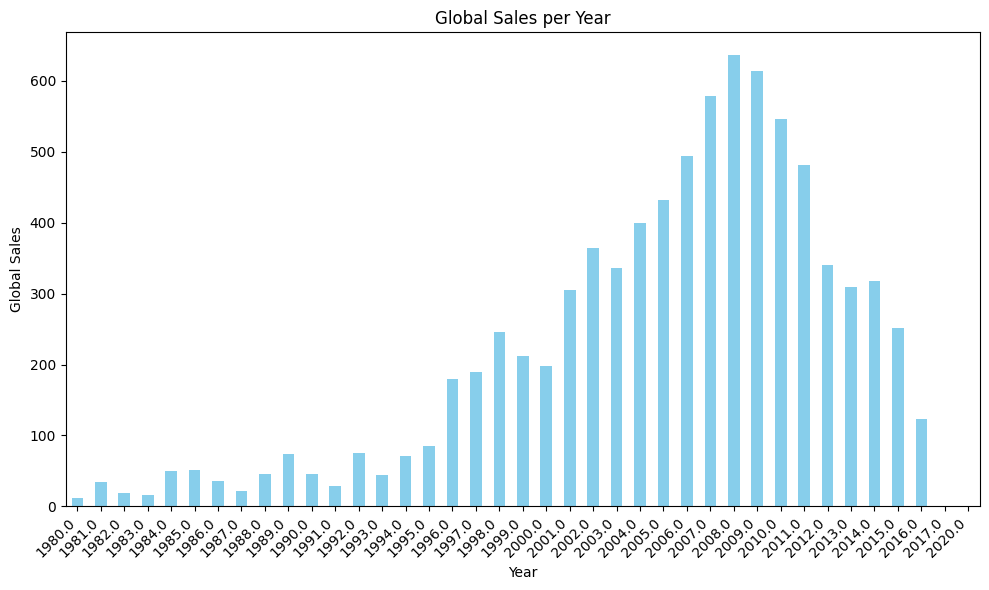

In [ ]:
yearly_sales = df.groupby('Year_of_Release')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

plt.figure(figsize=(10, 6))
yearly_sales['Global_Sales'].plot(kind='bar', color='skyblue')
plt.title('Global Sales per Year')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
df_top10_GlobalSales = df[['Name','Platform', 'Year_of_Release', 'Genre', 'Global_Sales']].sort_values(by = 'Global_Sales', ascending = False).head(10)
df_top10_GlobalSales


,Name,Platform,Year_of_Release,Genre,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,82.53
1,Super Mario Bros.,NES,1985.0,Platform,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,31.37
5,Tetris,GB,1989.0,Puzzle,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,29.80
7,Wii Play,Wii,2006.0,Misc,28.92
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,28.32
9,Duck Hunt,NES,1984.0,Shooter,28.31


Value counts for Publisher:
Publisher
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Valve                              1
ITT Family Games                   1
Elite                              1
Evolution Games                    1
Red Flagship                       1
Name: count, Length: 581, dtype: int64


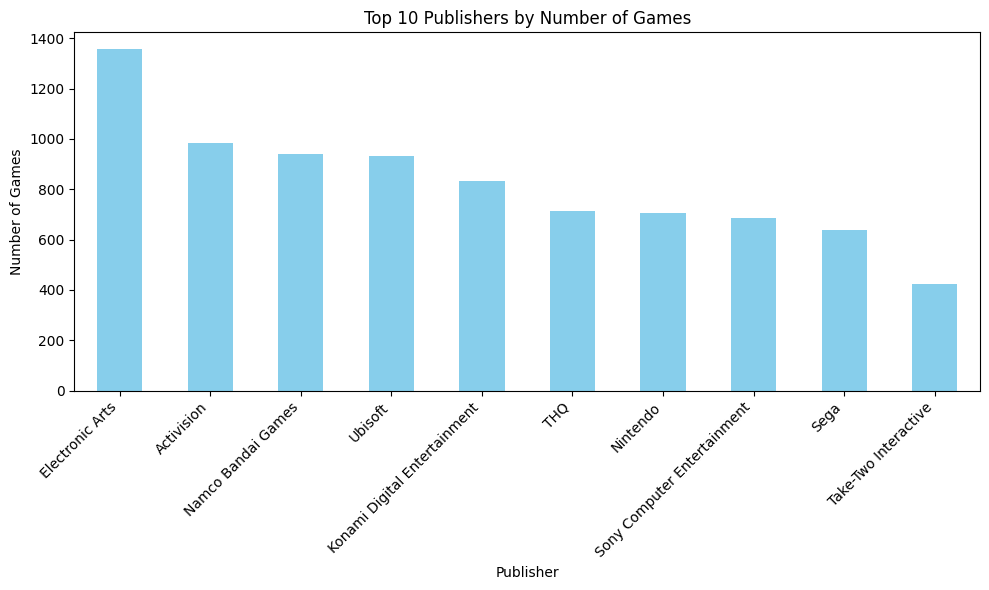

In [ ]:

publisher_counts = df['Publisher'].value_counts()
print("Value counts for Publisher:")
print(publisher_counts)

#top 10 publishers
plt.figure(figsize=(10, 6))
publisher_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Number of Games')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Value counts for Genre:
Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64


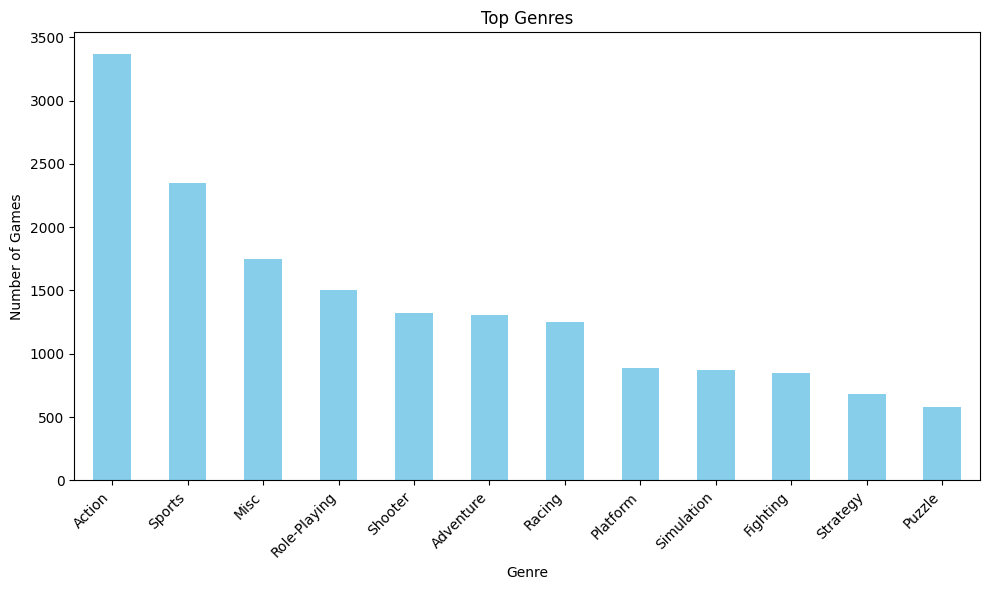

In [ ]:
# total  redondance our chaque genre
publisher_genre = df['Genre'].value_counts()
print("Value counts for Genre:")
print(publisher_genre)

plt.figure(figsize=(10, 6))
publisher_genre.plot(kind='bar', color='skyblue')
plt.title('Top Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
features = ['Publisher','Developer','Genre', 'Platform','User_Score']

X = df[features].fillna(0)
X = pd.get_dummies(X)
X = StandardScaler().fit_transform(X)

similarity_matrix = cosine_similarity(X, X)

target_game_index = 32
target_game = df.iloc[target_game_index]

print("Target Game:")
print(target_game[['Name', 'Platform', 'Genre', 'Critic_Score', 'User_Score']])

similar_games_indices = similarity_matrix[target_game_index].argsort()[::-1][1:6]

recommended_games = df.iloc[similar_games_indices]

print("Recommended Games:")
print(recommended_games[['Name', 'Platform', 'Genre', 'Critic_Score', 'User_Score']])


Target Game:
Name            Call of Duty: Black Ops
Platform                           X360
Genre                           Shooter
Critic_Score                       87.0
User_Score                          6.3
Name: 32, dtype: object
Recommended Games:
                                  Name Platform    Genre  Critic_Score  \
14660           007: Quantum of Solace       PC   Action          70.0   
100         Call of Duty: World at War     X360  Shooter          84.0   
10571  Minority Report: Everybody Runs       GC   Action          53.0   
12625        Kelly Slater's Pro Surfer       GC   Sports          80.0   
567        Call Of Duty 2: Big Red One      PS2  Shooter          77.0   

      User_Score  
14660        6.3  
100          7.6  
10571        tbd  
12625        tbd  
567          8.2  


In [ ]:
features = ['Name','Genre', 'Publisher', 'Developer', 'Rating', 'JP_Sales', 'EU_Sales', 'NA_Sales', 'Other_Sales']

df['combined_features'] = df[features].apply(lambda x: ' '.join(x.astype(str)), axis=1)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

target_game_index = 41
target_game_name = df.loc[target_game_index, 'Name']

target_game_index = df.index[df['Name'] == target_game_name].tolist()[0]

user_location = 'EU'

if user_location == 'JP':
    sales_column = 'JP_Sales'
elif user_location == 'EU':
    sales_column = 'EU_Sales'
elif user_location == 'NA':
    sales_column = 'NA_Sales'
else:
    sales_column = 'Other_Sales'

top_sales_indices = df[sales_column].nlargest(1000).index

similar_games_indices = cosine_sim[target_game_index].argsort()[::-1][1:21]

recommended_games_indices = [index for index in similar_games_indices if index in top_sales_indices]

print("Recommended Games like", target_game_name, "in", user_location, ":")
for index in recommended_games_indices:
    print(df.loc[index, 'Name'],'Platform : ',df.loc[index,'Platform'])


Recommended Games like Call of Duty: Black Ops in EU :
Call of Duty: Black Ops 3 Platform :  XOne
Call of Duty: Black Ops Platform :  PC
Call of Duty: Black Ops II Platform :  PC
Call of Duty: Black Ops Platform :  PS3
Call of Duty: Black Ops II Platform :  PS3
Call of Duty: Black Ops 3 Platform :  PS4
Call of Duty: Black Ops 3 Platform :  PS3
Call of Duty 3 Platform :  PS3
Call of Duty 3 Platform :  X360


In [ ]:
features = ['Name','Developer','Genre','User_Score']

df['combined_features'] = df[features].apply(lambda x: ' '.join(x.astype(str)), axis=1)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

target_game_index = 1462
target_game_name = df.loc[target_game_index, 'Name']

target_game_index = df.index[df['Name'] == target_game_name].tolist()[0]

user_platforms = ['PS4', 'Xbox One', 'PC']

similar_games_indices = cosine_sim[target_game_index].argsort()[::-1][1:101]
recommended_games_indices = [index for index in similar_games_indices if df.loc[index, 'Platform'] in user_platforms]

print("Recommended Games like", target_game_name, "on User's Preferred Platforms:")
for index in recommended_games_indices:
    print(df.loc[index, 'Name'])


Recommended Games like NBA 2K15 on User's Preferred Platforms:
NBA 2K15
NBA 2K12
NBA 2K16
NBA 2K17
NBA 2K17
NBA 2K13
NBA 2K14
NBA 2K11
WWE 2K15
Major League Baseball 2K11
Major League Baseball 2K12
